In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/content/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.shape

(8950, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#Data Preprocessing

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)

In [8]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [9]:
data = data.drop('CUST_ID', axis = 1)

In [10]:
#data normalization
normalized_data = normalize(data)

In [11]:
#Dimension Reduction using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(normalized_data)
X = pd.DataFrame(X)
X.columns = ['P1','P2']
X.head()

,P1,P2
0,-0.315267,-0.041609
1,0.318365,-0.161007
2,-0.207153,-0.180748
3,-0.291843,-0.113087
4,0.142319,-0.090890


#Agglomerative Clustering

In [12]:
model=AgglomerativeClustering(affinity='euclidean', linkage='ward')
clust_labels=model.fit_predict(X) 
agglomerative=pd.DataFrame(clust_labels)

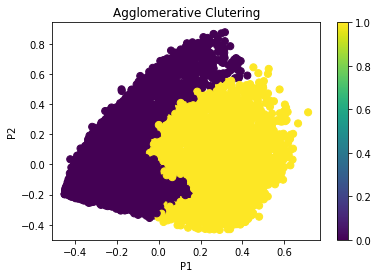

In [13]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (X['P1'] , X["P2"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("P1")
ax.set_ylabel("P2")
plt.colorbar(scatter)

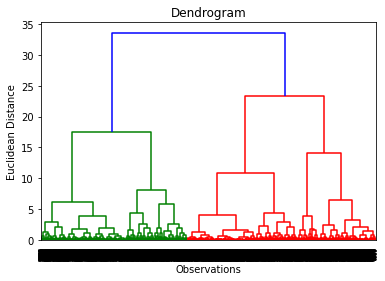

In [14]:
#dendrogram visualization
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean Distance')
plt.show()

#KMeans Algorithm

In [15]:
#KMeans with n_clusters=2
kmeans=KMeans(n_clusters=2, random_state=0)  
kmeans.fit(X)
labels=pd.DataFrame(kmeans.labels_)

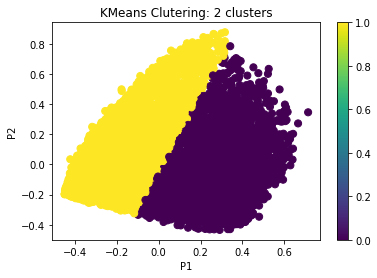

In [16]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (X['P1'] , X["P2"] , c= labels[0], s=50)
ax.set_title("KMeans Clutering: 2 clusters")
ax.set_xlabel("P1")
ax.set_ylabel("P2")
plt.colorbar(scatter)

Although the agglomerative clustering algorithm give us a model with 2 clusters and we predefined the number of clusters as 2 in KMeans algorithm, but the shape of it, is different in the 2 models which means that some data points is in a cluster in the first model but it is in different one in the kmeans model.  

In [17]:
#KMeans with n_clusters=3
kmeans=KMeans(n_clusters=3, random_state=0)  
kmeans.fit(X)
labels=pd.DataFrame(kmeans.labels_)

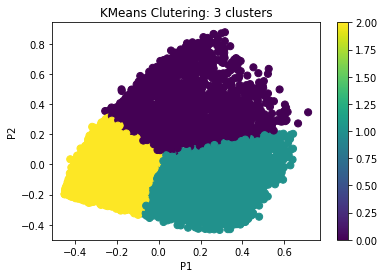

In [18]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (X['P1'] , X["P2"] , c= labels[0], s=50)
ax.set_title("KMeans Clutering: 3 clusters")
ax.set_xlabel("P1")
ax.set_ylabel("P2")
plt.colorbar(scatter)

In [19]:
#KMeans with n_clusters=4
kmeans=KMeans(n_clusters=4, random_state=0)  
kmeans.fit(X)
labels=pd.DataFrame(kmeans.labels_)

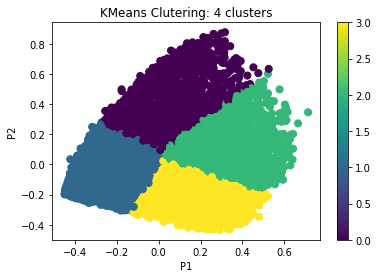

In [20]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (X['P1'] , X["P2"] , c= labels[0], s=50)
ax.set_title("KMeans Clutering: 4 clusters")
ax.set_xlabel("P1")
ax.set_ylabel("P2")
plt.colorbar(scatter)

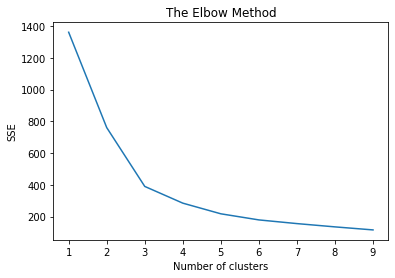

In [21]:
sse=[]
for k in range(1,10):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)
plt.plot(range(1,10),sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

The elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE). We pick k at the spot where SSE starts forming an elbow. So based on this graph we can say that our data points should be grouped into 3 clusters